In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
trainFile = "data/mnist_train.csv"
testFile ="data/mnist_test.csv"

In [3]:
trainData = pd.read_csv(trainFile,delimiter=",",header=None)
testData =  pd.read_csv(testFile,delimiter=",",header=None)

In [4]:
trainData.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(len(trainData),len(testData))

60000 10000


In [6]:
# Data parsing
trainYPre = np.array(trainData[0].values.tolist())
testYPre = np.array(testData[0].values.tolist())
loc = [i for i in range(1,785)]
trainXPre = np.array(trainData[loc].values.tolist())
testXPre = np.array(testData[loc].values.tolist())

In [7]:
print(len(trainYPre),len(testYPre),trainXPre.shape,testXPre.shape)

60000 10000 (60000, 784) (10000, 784)


In [8]:
# Data preparation
n_train = 6000
n_test = 1000
trainX = trainXPre[0:n_train,:]
trainY = trainYPre[0:n_train]
testX = testXPre[0:n_test,:]
testY = testYPre[0:n_test]

In [9]:
print(len(trainY),len(testY),trainX.shape,testX.shape)

6000 1000 (6000, 784) (1000, 784)


In [10]:
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
K = [1, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]

In [11]:
class KNN:
    '''Nearest Neighbor Class Implementation'''
    def __init__(self, k):
        self.K = k

    def calcDistance(self, X, Y):
        ''' Calculates the Eucleidian distance between two numpy arrays  '''
        distance = np.sqrt(np.sum((X-Y)**2,axis=1))
        return distance

    def predict(self, trainX, trainY, testX):
        ''' Predicts the class of each test data'''
        n_testX = len(testX)
        pred = []
        for i in tqdm(range(n_testX)):
            dist = self.calcDistance(trainX, testX[i])
            sorted_dist = np.argsort(dist)
            minKDist = sorted_dist[:self.K]
            minKVotes = trainY[minKDist]
            eachPredClass = np.argsort(np.bincount(minKVotes.astype('int')))[-1]
            pred.append(eachPredClass)
        return pred
        
    def accuracy(self, predY, goldY):
        ''' Calculates error rate  of the code'''
        predY = np.array(predY)
        goldY = np.array(goldY)
        match = np.count_nonzero(predY == goldY)
        return round((1 - (match/len(goldY))),4)
    
def visualization(trainError, testError, KList):
    ''' Produces the visualization through graph '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(KList, trainError, label='TrainAccuracy',marker='o')
    ax.plot(KList, testError, label='TestAccuracy',marker='o')
    plt.xlim(0,110)
    plt.ylim(0,0.2)
    plt.title("KNN-Accuracy vs K")
    plt.legend()
    plt.xlabel("K")
    plt.ylabel("Error_Rate")
    fig.savefig("AccuracyVsK.png")

In [12]:
# Main driver
n_iteration = 5
test_error = []
train_error = []
for eachK in K:
    print ("K:",eachK)
    knn = KNN(eachK)
    test_eachKError = []
    train_eachKError = []
    for eachIter in range(n_iteration):
        predY = knn.predict(trainX, trainY, testX)
        #goldY = testY.astype('int').tolist()
        goldY = testY
        error = knn.accuracy(predY, goldY)
        test_eachKError.append(error)
        
        print (error)
        
        predY = knn.predict(trainX, trainY, trainX)
        #goldY = trainY.astype('int').tolist()
        goldY = trainY
        error = knn.accuracy(predY, goldY)
        train_eachKError.append(error)
        
        print (error)
    test_error.append(sum(test_eachKError)/len(test_eachKError))
    train_error.append(sum(train_eachKError)/len(train_eachKError))
    print(test_error[-1],train_error[-1])
    
print (test_error)
print (train_error)

K: 1


A Jupyter Widget


0.096


A Jupyter Widget


0.0


A Jupyter Widget


0.096


A Jupyter Widget


0.0


A Jupyter Widget


0.096


A Jupyter Widget


0.0


A Jupyter Widget


0.096


A Jupyter Widget


0.0


A Jupyter Widget


0.096


A Jupyter Widget


0.0
0.096 0.0
K: 9


A Jupyter Widget


0.084


A Jupyter Widget


0.0485


A Jupyter Widget


0.084


A Jupyter Widget


0.0485


A Jupyter Widget


0.084


A Jupyter Widget


0.0485


A Jupyter Widget


0.084


A Jupyter Widget


0.0485


A Jupyter Widget


0.084


A Jupyter Widget


0.0485
0.084 0.0485
K: 19


A Jupyter Widget


0.109


A Jupyter Widget


0.0667


A Jupyter Widget


0.109


A Jupyter Widget


0.0667


A Jupyter Widget


0.109


A Jupyter Widget


0.0667


A Jupyter Widget


0.109


A Jupyter Widget


0.0667


A Jupyter Widget


0.109


A Jupyter Widget


0.0667
0.10900000000000001 0.0667
K: 29


A Jupyter Widget


0.127


A Jupyter Widget


0.0768


A Jupyter Widget


0.127


A Jupyter Widget


0.0768


A Jupyter Widget


0.127


A Jupyter Widget


0.0768


A Jupyter Widget


0.127


A Jupyter Widget


0.0768


A Jupyter Widget


0.127


A Jupyter Widget


0.0768
0.127 0.0768
K: 39


A Jupyter Widget


0.131


A Jupyter Widget


0.086


A Jupyter Widget


0.131


A Jupyter Widget


0.086


A Jupyter Widget


0.131


A Jupyter Widget


0.086


A Jupyter Widget


0.131


A Jupyter Widget


0.086


A Jupyter Widget


0.131


A Jupyter Widget


0.086
0.131 0.086
K: 49


A Jupyter Widget


0.132


A Jupyter Widget


0.0933


A Jupyter Widget


0.132


A Jupyter Widget


0.0933


A Jupyter Widget


0.132


A Jupyter Widget


0.0933


A Jupyter Widget


0.132


A Jupyter Widget


0.0933


A Jupyter Widget


0.132


A Jupyter Widget


0.0933
0.132 0.0933
K: 59


A Jupyter Widget


0.144


A Jupyter Widget


0.1013


A Jupyter Widget


0.144


A Jupyter Widget


0.1013


A Jupyter Widget


0.144


A Jupyter Widget


0.1013


A Jupyter Widget


0.144


A Jupyter Widget


0.1013


A Jupyter Widget


0.144


A Jupyter Widget


0.1013
0.144 0.10129999999999999
K: 69


A Jupyter Widget


0.152


A Jupyter Widget


0.1063


A Jupyter Widget


0.152


A Jupyter Widget


0.1063


A Jupyter Widget


0.152


A Jupyter Widget


0.1063


A Jupyter Widget


0.152


A Jupyter Widget


0.1063


A Jupyter Widget


0.152


A Jupyter Widget


0.1063
0.152 0.10630000000000002
K: 79


A Jupyter Widget


0.155


A Jupyter Widget


0.1128


A Jupyter Widget


0.155


A Jupyter Widget


0.1128


A Jupyter Widget


0.155


A Jupyter Widget


0.1128


A Jupyter Widget


0.155


A Jupyter Widget


0.1128


A Jupyter Widget


0.155


A Jupyter Widget


0.1128
0.155 0.11279999999999998
K: 89


A Jupyter Widget


0.165


A Jupyter Widget


0.1187


A Jupyter Widget


0.165


A Jupyter Widget


0.1187


A Jupyter Widget


0.165


A Jupyter Widget


0.1187


A Jupyter Widget


0.165


A Jupyter Widget


0.1187


A Jupyter Widget


0.165


A Jupyter Widget


0.1187
0.165 0.1187
K: 99


A Jupyter Widget


0.17


A Jupyter Widget


0.1253


A Jupyter Widget


0.17


A Jupyter Widget


0.1253


A Jupyter Widget


0.17


A Jupyter Widget


0.1253


A Jupyter Widget


0.17


A Jupyter Widget


0.1253


A Jupyter Widget


0.17


A Jupyter Widget


0.1253
0.17 0.1253
[0.096, 0.084, 0.10900000000000001, 0.127, 0.131, 0.132, 0.144, 0.152, 0.155, 0.165, 0.17]
[0.0, 0.0485, 0.0667, 0.0768, 0.086, 0.0933, 0.10129999999999999, 0.10630000000000002, 0.11279999999999998, 0.1187, 0.1253]


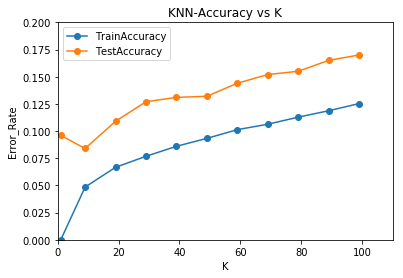

In [13]:
visualization(train_error, test_error, K)